In [2]:
%pylab inline
import h5py
import grispy as gsp

Populating the interactive namespace from numpy and matplotlib


In [6]:
path = '/home/arodriguez/BACCO/bias-voids/pruebas_fit/'

# voids file

v0 = np.loadtxt(path+'voids_full_k0.75.dat',skiprows=1,delimiter=',')
v1 = np.loadtxt(path+'voids_full_k0.5.dat',skiprows=1,delimiter=',')
#v2 = np.loadtxt(path+'voids_k0.25.dat',skiprows=1,delimiter=',')

print(len(v2))

116


In [6]:
np.min(v2[:,3])

12.0

In [7]:
pos0 = v0[:,:3]
pos1 = v1[:,:3]

[]

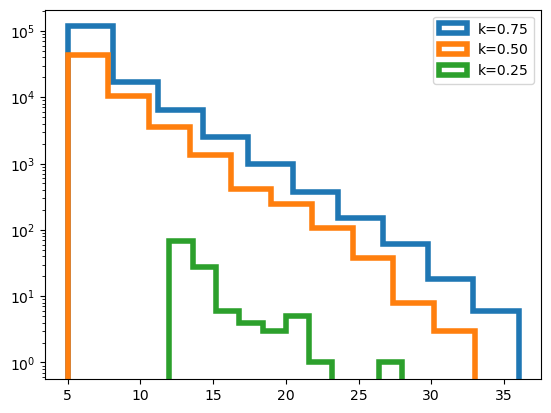

In [8]:
plt.hist(v0[:,3],histtype='step',label='k=0.75',lw=4)
plt.hist(v1[:,3],histtype='step',label='k=0.50',lw=4)
plt.hist(v2[:,3],histtype='step',label='k=0.25',lw=4)
plt.legend()
plt.semilogy()

In [34]:
Lbox = 1440
periodic = {0: (0, Lbox), 1: (0, Lbox), 2: (0,Lbox)}
grid = gsp.GriSPy(pos0, periodic=periodic)

In [59]:
n_nearest = 1
mask1, = np.where(v1[:,3]>0)
centres = pos1[mask1,:]
near_dist, near_ind = grid.nearest_neighbors(centres, n=n_nearest)

In [75]:
dist_lim = 130   # Mpc

v0_X = []; v0_Y = []; v0_Z = []; r0 = []
v1_X = []; v1_Y = []; v1_Z = []; r1 = []

for i in range(len(mask1)):
    
    dist = near_dist[i][0]
    
    if dist < dist_lim:
               
        x1 = v1[mask1,0][i]
        y1 = v1[mask1,1][i]
        z1 = v1[mask1,2][i]    
        
        v0_X.append(x1)
        v0_Y.append(y1)
        v0_Z.append(z1)
        r0.append(v1[mask1,3][i])
        
        sel = near_ind[i][0]
        v1_X.append(pos0[sel,0])
        v1_Y.append(pos0[sel,1])
        v1_Z.append(pos0[sel,2])
        r1.append(v0[sel,3])
        
print(len(r1))

1161


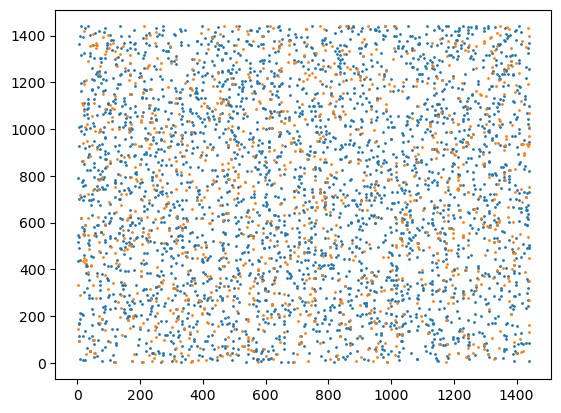

In [64]:
plt.plot(pos0[:,0],pos0[:,1],ls='none',marker='o',markersize=1)
plt.plot(pos1[:,0],pos1[:,1],ls='none',marker='o',markersize=1)

In [31]:
# selecciono los voids en k=0.5 y los localizo en k=0.75

mask1, = np.where(v1[:,3]>18)
dist_lim = 5   # Mpc

v0_X = []; v0_Y = []; v0_Z = []; r0 = []
v1_X = []; v1_Y = []; v1_Z = []; r1 = []

for i in range(len(mask1)):
    
    x1 = v1[mask1,0][i]
    y1 = v1[mask1,1][i]
    z1 = v1[mask1,2][i]
    
    #busco si hay void en ese lugar en la otra simu:
    
    sel, = np.where( np.sqrt((pos0[:,0]-x1)**2 + (pos0[:,1]-y1)**2 + (pos0[:,2]-z1)**2)<dist_lim)
            
    if len(sel)==1:
         
        v0_X.append(x1)
        v0_Y.append(y1)
        v0_Z.append(z1)
        r0.append(v1[mask1,3][i])
        
        v1_X.append(pos0[sel,0])
        v1_Y.append(pos0[sel,1])
        v1_Z.append(pos0[sel,2])
        r1.append(v0[sel,3])

In [32]:
len(r0)

50